## Sentiment Analysis using Keras and Tensorflow on Movie Reviews

Taniya Adhikari 08/14/2023

#### Loading Data Set

In [10]:
import numpy as np
from tensorflow.keras.datasets import imdb

In [11]:
# splitting into training and test dataset. 
# each review is list of word indices. train labels: 0 = negative, 1 = positive.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [12]:
max([max(sequence) for sequence in train_data])

9999

In [13]:
# maps words to an integer index
word_index = imdb.get_word_index()
#word_index

In [14]:
# maps integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#### Preparing Dataset

In [15]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Building your network

In [18]:
# Import keras libraries
from keras import models, layers, losses, metrics, optimizers

Using TensorFlow backend.


In [19]:
# Creating a neural net with shape (1000,16,16,1)
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

#### Compiling the model

In [20]:
model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

#### Configuring the optimizer

In [21]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001), 
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

#### Custom losses and metrics

In [22]:
# using custom loses and metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#### Validating the model

In [23]:
# Splitting the data into validation and train set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training the model

In [24]:
model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [25]:
# Training the neural network with partial_x_train and partial_y_train
history = model.fit(partial_x_train, 
                  partial_y_train, 
                  epochs = 20, 
                  batch_size = 512, 
                  validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

#### Plotting the training and validation loss

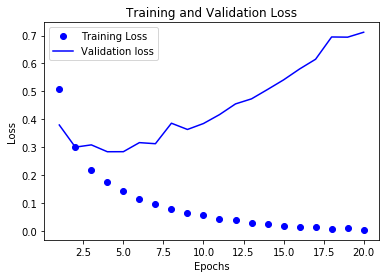

In [27]:
import matplotlib.pyplot as plt
acc = history_dict['acc']
val_acc = history_dict['val_acc']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(acc)+ 1)

plt.plot(epochs, loss_values,  'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

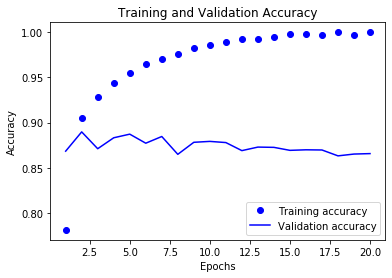

In [28]:
plt.plot(epochs, acc,  'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### The model is running into overfitting so we will re-train the model with only 4 epochs. 

In [30]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.fit(partial_x_train,
          partial_y_train, 
          epochs = 4, 
          batch_size = 512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
15000/15000 [==============================] - 1s 82us/step - loss: 0.5013 - accuracy: 0.7923
Epoch 2/4
15000/15000 [==============================] - 1s 71us/step - loss: 0.2950 - accuracy: 0.8998
Epoch 3/4
15000/15000 [==============================] - 1s 74us/step - loss: 0.2150 - accuracy: 0.9301
Epoch 4/4
25000/25000 [==============================] - 2s 88us/step


[0.298825613489151, 0.8781599998474121]

#### Use trained model to generate predictions

In [21]:
model.predict(x_test)

array([[0.33491266],
       [0.9995926 ],
       [0.9345059 ],
       ...,
       [0.14445111],
       [0.19112667],
       [0.65519667]], dtype=float32)

#### Re-training the model with 3 hidden layers to see if the accuracy increases and more hidden units

In [50]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.fit(partial_x_train,
          partial_y_train, 
          epochs = 4, 
          batch_size = 512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
15000/15000 [==============================] - 1s 96us/step - loss: 0.4816 - accuracy: 0.7677
Epoch 2/4
15000/15000 [==============================] - 1s 90us/step - loss: 0.2571 - accuracy: 0.9057 0s - loss: 0.2757 - 
Epoch 3/4
15000/15000 [==============================] - 1s 92us/step - loss: 0.1878 - accuracy: 0.9323
Epoch 4/4
25000/25000 [==============================] - 3s 104us/step


[0.3318647544670105, 0.8728799819946289]

In [51]:
model.predict(x_test)

array([[0.1258518 ],
       [0.9997173 ],
       [0.617014  ],
       ...,
       [0.0627519 ],
       [0.044314  ],
       [0.60915244]], dtype=float32)